In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
from time import time

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics

#### About 20_newsgroups data set
The returned dataset after fetch_20newsgroups function is a scikit-learn “bunch”: a simple holder object with fields that can be both accessed as python dict keys or object attributes for convenience, for instance the target_names holds the list of the requested category names:

In [78]:
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
train_20_newsgroups = fetch_20newsgroups(subset='train', shuffle=True, categories = categories, random_state = 21)

The files are loaded in memory in the data attribute. 

In [79]:
print('The following newsgroups will be trained', train_20_newsgroups.target_names)
print('The no of sentences', len(train_20_newsgroups.data))

The following newsgroups will be trained ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
The no of sentences 2257


Printing the first loaded file and first line of the file. For speed and space efficiency reasons scikit-learn loads the target attribute as an array of integers that corresponds to the index of the category name in the target_names list. The category integer id of each sample is stored in the target attribute:

In [80]:
print("\n".join(train_20_newsgroups.data[0].split("\n")[:3]))
print('File name: ', train_20_newsgroups.target_names[train_20_newsgroups.target[0]])

From: ederveen@athena.research.ptt.nl (Ederveen D.)
Subject: Micro World Data Bank II ?
Nntp-Posting-Host: athena.research.ptt.nl
File name:  comp.graphics


#### Create test data set

In [10]:
test_20_newsgroups = fetch_20newsgroups(subset = 'test', shuffle = True, categories = categories, random_state = 21)
docs_test_20_newsgroups = test_20_newsgroups.data
print('Keys: ',test_20_newsgroups.keys(),  '\nTarget Names: ',test_20_newsgroups.target_names)
#test_20_newsgroups.target_names

Keys:  dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR']) 
Target Names:  ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


#### Building a pipeline and training using Multinomial NB

In [84]:
t0 = time()
nb_clf = Pipeline([('vect', TfidfVectorizer()),
                  ('clf', MultinomialNB())
                 ])
nb_clf.fit(train_20_newsgroups.data, train_20_newsgroups.target)
nb_predict_time = round((time() -t0),2)
print('Time taken to execute NB Classifier: ',nb_predict_time,'secs')
nb_predict = nb_clf.predict(test_20_newsgroups.data)
nb_predict_acc = round(np.mean(nb_predict == test_20_newsgroups.target) * 100, 2)
print('NB Prediction Accuracy- ',nb_predict_acc)

Time taken to execute NB Classifier:  1.04 secs
NB Prediction Accuracy-  83.49


#### Evaluate the performance of test data using Naive Bayes

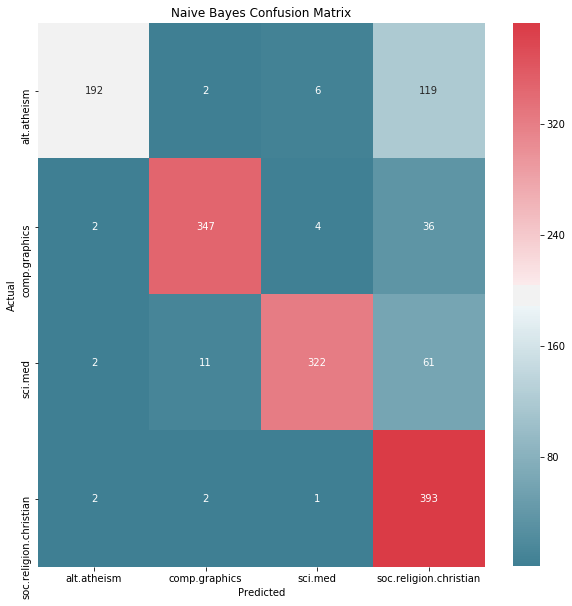

In [16]:
nb_conf_mat = metrics.confusion_matrix(test_20_newsgroups.target, nb_predict)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(nb_conf_mat, annot=True, fmt='d', cmap=sns.diverging_palette(220,10, as_cmap=True),
            xticklabels = test_20_newsgroups.target_names, yticklabels = test_20_newsgroups.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [124]:
### Do a prediction
test_doc = ['God is love', 'Are you crazy:', 'Love is eternal', 'Machine Learning w/ computer is the way to go']
test_nb_predict = nb_clf.predict(test_doc)
print('Test prediction: ', test_nb_predict)


for test_doc, category in zip(test_doc, test_nb_predict):
    print('%r => %s' % (test_doc, test_20_newsgroups.target_names[category]))

Test prediction:  [3 0 3 2]
'God is love' => soc.religion.christian
'Are you crazy:' => alt.atheism
'Love is eternal' => soc.religion.christian
'Machine Learning w/ computer is the way to go' => sci.med


### Testing results with SGD

In [86]:
t0 = time()
svm_clf = Pipeline([('vect', TfidfVectorizer(sublinear_tf=True , norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')),
                    ('clf', SGDClassifier(loss = 'hinge', penalty ='l2', alpha=1e-3, n_iter=5, random_state=21) )
                   ])
svm_clf.fit(train_20_newsgroups.data, train_20_newsgroups.target)
print('Time taken to execute SGD Classifier: ', round((time() -t0),2),'secs')
sgd_svm_predict = svm_clf.predict(test_20_newsgroups.data)
sgd_svm_predict_acc = round(np.mean(sgd_svm_predict == test_20_newsgroups.target) * 100, 2)
print('SGD prediction: ', sgd_svm_predict_acc)

C:\Users\Yasim\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Time taken to execute SGD Classifier:  3.73 secs
SGD prediction:  91.94


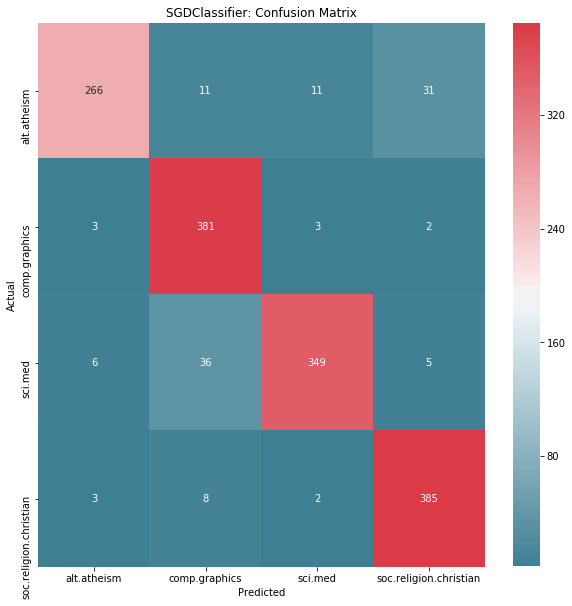

In [87]:
svm_conf_mat = metrics.confusion_matrix(test_20_newsgroups.target, sgd_svm_predict)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(svm_conf_mat, annot=True, fmt='d', cmap = sns.diverging_palette(220,10, as_cmap=True),
            xticklabels=test_20_newsgroups.target_names , yticklabels= test_20_newsgroups.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SGDClassifier: Confusion Matrix')
plt.show()

###  Testing results with LinearSVC (Most preferred classifier based on results)

In [88]:
print("LinearSVC with L1/2 based feature selection")
# The more regularization, the more sparsity.
t0 = time()
lsvc_clf = Pipeline([('vect', TfidfVectorizer(sublinear_tf=True , norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')),
                     ('clf', LinearSVC(penalty = 'l2', dual = False, multi_class='ovr', tol=0.0001, random_state=21))
                    ])
lsvc_clf.fit(train_20_newsgroups.data, train_20_newsgroups.target)
lsvc_predict_time = round((time() -t0),2)
print('Time taken to execute LinearSVC: ', lsvc_predict_time,'secs')
lsvc_predict = lsvc_clf.predict(test_20_newsgroups.data)
lsvc_predict_acc = round(np.mean(lsvc_predict == test_20_newsgroups.target) * 100, 2)
print('Linear SVC Prediction Accuracy: ',lsvc_predict_acc)

LinearSVC with L1/2 based feature selection
Time taken to execute LinearSVC:  5.83 secs
Linear SVC Prediction Accuracy:  93.14


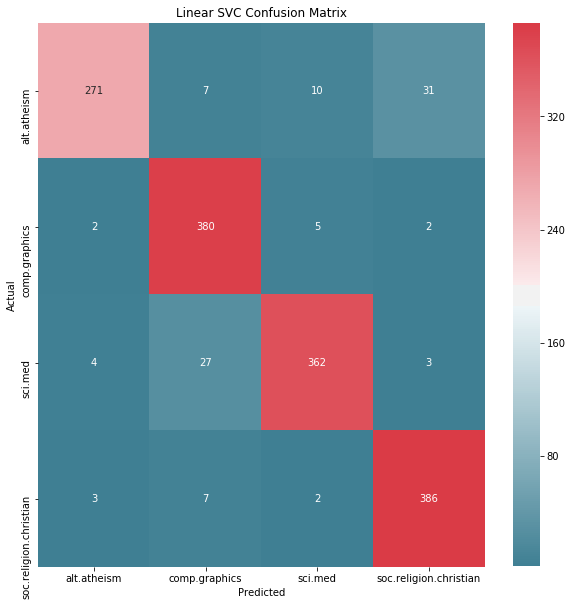

In [89]:
lsvc_conf_mat = metrics.confusion_matrix(test_20_newsgroups.target, lsvc_predict)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(lsvc_conf_mat, annot=True, fmt='d', cmap = sns.diverging_palette(220,10, as_cmap=True),
            xticklabels=test_20_newsgroups.target_names , yticklabels= test_20_newsgroups.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Linear SVC Confusion Matrix')
plt.show()

In [29]:
for input_doc, prediction, label in zip(test_20_newsgroups.data, lsvc_predict ,test_20_newsgroups.target_names):
    if prediction != label:
        print(input_doc, 'has been classified as ',prediction, 'and should be ',label)

From: nagle@netcom.com (John Nagle)
Subject: Re: Point in Polygon routine needed
Organization: NETCOM On-line Communication Services (408 241-9760 guest)
Lines: 18

Andrew Lewis Tepper <at15+@andrew.cmu.edu> writes:
>I don't know if this routine is "standard", I just came up with it recently:
>For a polygon of points p1...pn, and a point P, make a table as follows:
>T(1)= angle from p1 to P to p2
>T(2)= angle from p2 to P to p3
>...
>T(n)= angle from pn to P to p1
>express all angles as: -PI < angle < PI.
>Add all entries in the table. If the sum = 0, the point is outside. If
>the sum is +/- PI, the point is inside. If the point is +/- xPI, you
>have a strange polygon. If ANY angle was = +/-PI, the point is on the
>border.

     I think it's known, but it's neat.

     Can it be extended to 3D?

						John Nagle
 has been classified as  1 and should be  alt.atheism
From: d91tm@efd.lth.se (Tomas Moeller)
Subject: WANTED : Scott  Leatham @ Microsoft
Organization: Lund Institute of Techno

In [40]:
new_df = pd.DataFrame({ key:pd.Series(value) for key, value in test_20_newsgroups.items() })
new_df

,data,filenames,target_names,target,DESCR
0,From: nagle@netcom.com (John Nagle)\nSubject: ...,C:\Users\Yasim\scikit_learn_data\20news_home\2...,alt.atheism,1,.. _20newsgroups_dataset:\n\nThe 20 newsgroups...
1,From: d91tm@efd.lth.se (Tomas Moeller)\nSubjec...,C:\Users\Yasim\scikit_learn_data\20news_home\2...,comp.graphics,1,NaN
2,From: ceci@lysator.liu.se (Cecilia Henningsson...,C:\Users\Yasim\scikit_learn_data\20news_home\2...,sci.med,2,NaN
3,From: gilham@csl.sri.com (Fred Gilham)\nSubjec...,C:\Users\Yasim\scikit_learn_data\20news_home\2...,soc.religion.christian,3,NaN
4,From: swf@elsegundoca.ncr.com (Stan Friesen)\n...,C:\Users\Yasim\scikit_learn_data\20news_home\2...,NaN,3,NaN
5,From: JEK@cu.nih.gov\nSubject: Jacob and Esau\...,C:\Users\Yasim\scikit_learn_data\20news_home\2...,NaN,3,NaN
6,From: tgk@cs.toronto.edu (Todd Kelley)\nSubjec...,C:\Users\Yasim\scikit_learn_data\20news_home\2...,NaN,0,NaN
7,From: picl25@fsphy1.physics.fsu.edu (PICL acco...,C:\Users\Yasim\scikit_learn_data\20news_home\2...,NaN,2,NaN
8,From: chorley@vms.ocom.okstate.edu\nSubject: R...,C:\Users\Yasim\scikit_learn_data\20news_home\2...,NaN,2,NaN
9,From: jcarey@news.weeg.uiowa.edu (John Carey)\...,C:\Users\Yasim\scikit_learn_data\20news_home\2...,NaN,2,NaN


In [73]:
# function to plot most frequent terms 
from nltk import FreqDist
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  
  fdist = FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()),   
             'count':list(fdist.values())}) 

# selecting top 30 most frequent words 
  d = words_df.nlargest(columns="count", n = terms)      
  plt.figure(figsize=(20,5)) 
  ax = sns.barplot(data=d, x= "word", y = "count") 
  ax.set(ylabel = 'Count') 
  plt.show()

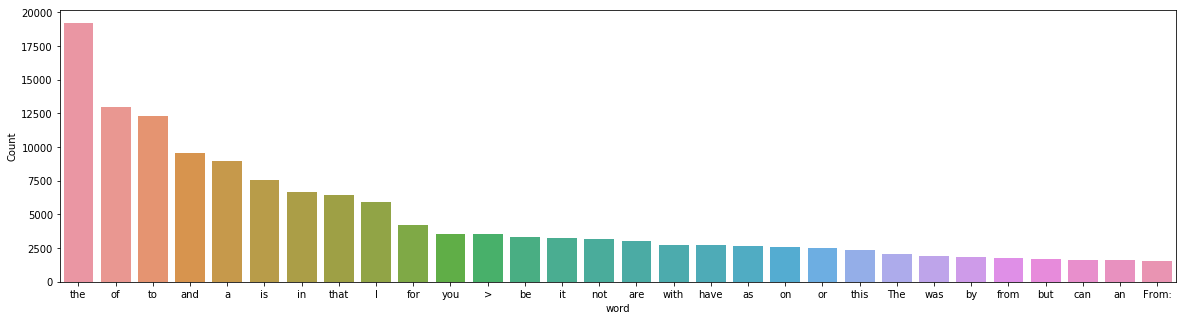

In [74]:
freq_words(new_df['data'])

### Testing results with RandomForestClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
t0 = time()
rf_clf = Pipeline([('vect', TfidfVectorizer(sublinear_tf=True , norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')),
                    ('clf' ,RandomForestClassifier(n_estimators = 200, max_depth=25, random_state=21))
                  ])
rf_clf.fit(train_20_newsgroups.data, train_20_newsgroups.target)
rf_predict_time = round((time() -t0),2)
print('Time taken by RandomForestClassifier: ', rf_predict_time,'secs')
rf_clf_predict = rf_clf.predict(test_20_newsgroups.data)
rf_predict_acc = round(np.mean(rf_clf_predict == test_20_newsgroups.target) * 100, 2)
print('RF Classsifier Prediction Accuracy: ', rf_predict_acc)

Time taken by RandomForestClassifier:  9.58 secs
RF Classsifier Prediction Accuracy:  78.96


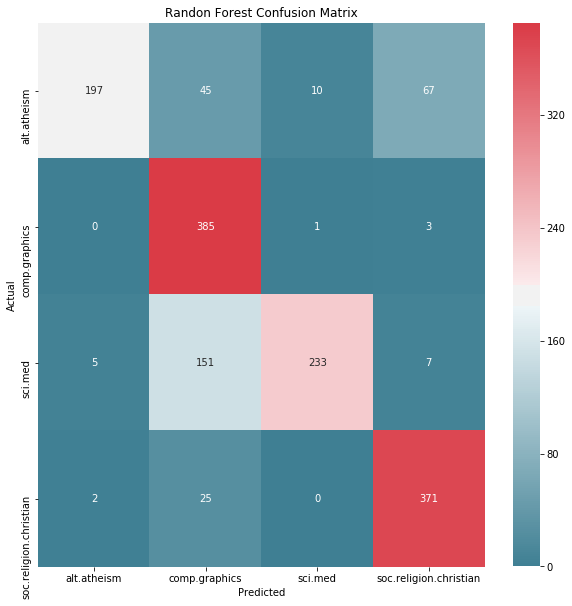

In [233]:
rf_conf_mat = metrics.confusion_matrix(test_20_newsgroups.target, rf_clf_predict)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(rf_conf_mat, annot=True, fmt='d', cmap = sns.diverging_palette(220,10, as_cmap=True),
            xticklabels=test_20_newsgroups.target_names , yticklabels= test_20_newsgroups.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Randon Forest Confusion Matrix')
plt.show()

### Testing results with Decision Tree

In [39]:
  ## Decision Tree
from sklearn.tree import DecisionTreeClassifier
print('Decision tree classifier')
t0 = time()
dt_clf = Pipeline([('vect', TfidfVectorizer(sublinear_tf = True, norm='l2', ngram_range=(1, 2), stop_words = 'english')),
                   ('clf', DecisionTreeClassifier(random_state=21)) ### max_depth=25
                  ])
dt_clf.fit(train_20_newsgroups.data, train_20_newsgroups.target)
dt_predict_time = round((time() -t0),2)
print('Time taken to Execute Decision Tree: ', dt_predict_time,'secs')
dt_clf_predict = dt_clf.predict(test_20_newsgroups.data)
dt_predict_acc = round(np.mean(dt_clf_predict == test_20_newsgroups.target) * 100, 2)
print('Decision tree Prediction Accuracy: ', dt_predict_acc)

Decision tree classifier
Time taken to Execute Decision Tree:  8.67 secs
Decision tree Prediction Accuracy:  69.31


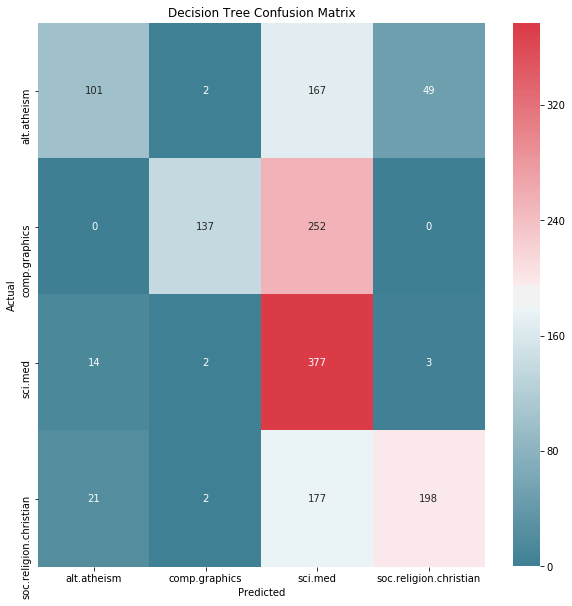

In [208]:
dt_clf_mat = metrics.confusion_matrix(test_20_newsgroups.target, dt_clf_predict)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dt_clf_mat, annot=True, fmt='d', cmap=sns.diverging_palette(220,10, as_cmap=True),
           xticklabels = test_20_newsgroups.target_names, yticklabels = test_20_newsgroups.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Testing results with K Nearest Neighbor classifier

In [40]:
  ## Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
print('K Nearest Neighbor classifier')
t0 = time()
knn_clf = Pipeline([('vect', TfidfVectorizer(sublinear_tf = True, norm='l2', ngram_range=(1,2), stop_words = 'english')),
                    ('clf', KNeighborsClassifier(n_neighbors=5))
                   ])
        
knn_clf.fit(train_20_newsgroups.data, train_20_newsgroups.target)
knn_predict_time = round((time() -t0),2)
print('Time taken to execute KNN: ', knn_predict_time,'secs')
knn_predict = knn_clf.predict(test_20_newsgroups.data)
knn_predict_acc = round(np.mean(knn_predict == test_20_newsgroups.target) * 100, 2)
print('K Nearest Neighbor Prediction Accuracy: ', knn_predict_acc)

K Nearest Neighbor classifier
Time taken to execute KNN:  5.19 secs
K Nearest Neighbor Prediction Accuracy:  84.02


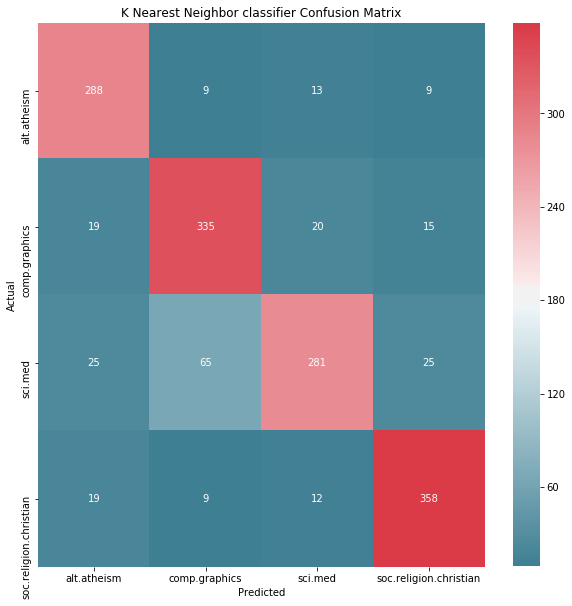

In [28]:
knn_clf_mat = metrics.confusion_matrix(test_20_newsgroups.target, knn_predict)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(knn_clf_mat, annot=True, fmt='d', cmap=sns.diverging_palette(220,10, as_cmap=True),
           xticklabels = test_20_newsgroups.target_names, yticklabels = test_20_newsgroups.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('K Nearest Neighbor classifier Confusion Matrix')
plt.show()

#### The final chosen algorithm chosen based on the prediction accuracy and based on confusion matrix is linear SVC. 
#### Calculate other metrics for Linear SVC such as precision, recall, F1 score etc. 

In [65]:
df = pd.DataFrame({
                   "model_names": ['Naive Bayes', 'Linear SVC', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbor', 'Logistics Regression'],
                   "accuracy": [nb_predict_acc, lsvc_predict_acc, rf_predict_acc, dt_predict_acc, knn_predict_acc, 80],
                   "Time taken:":[nb_predict_time, lsvc_predict_time, rf_predict_time, dt_predict_time, knn_predict_time,15]
                  })
df

,model_names,accuracy,Time taken:
0,Naive Bayes,83.49,1.07
1,Linear SVC,93.14,5.42
2,Random Forest,78.96,9.58
3,Decision Tree,69.31,8.67
4,K-Nearest Neighbor,84.02,5.19
5,Logistics Regression,80.00,15.00


Text(0.5, 1.0, 'Model Accuracy')

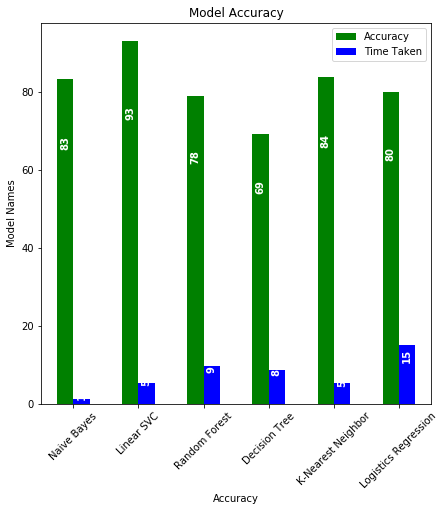

In [63]:
df = pd.DataFrame({
                   "model_names": ['Naive Bayes', 'Linear SVC', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbor', 'Logistics Regression'],
                   "accuracy": [nb_predict_acc, lsvc_predict_acc, rf_predict_acc, dt_predict_acc, knn_predict_acc, 80],
                   "Time taken:":[nb_predict_time, lsvc_predict_time, rf_predict_time, dt_predict_time, knn_predict_time,15]
                  })
df.set_index("model_names",drop=True,inplace=True)
ax = df.plot(figsize = (7,7), kind='bar', color=["g","b"], rot=45)
ax.legend(["Accuracy", "Time Taken"]);

for patch in ax.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    # change 0.92 to move the text up and down
    y = 0.80 * patch.get_height() + bl[1] 
    ax.text(x,y,"%d" %(patch.get_height()),
            ha='center', rotation='vertical', weight = 'bold', color = 'white')

plt.xlabel('Accuracy')
plt.ylabel('Model Names')
plt.title('Model Accuracy')

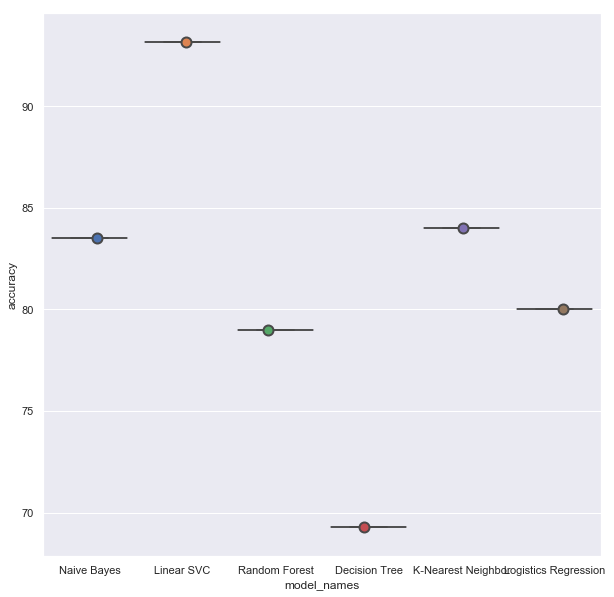

In [84]:
import seaborn as sns
sns.boxplot(x='model_names', y='accuracy', data=df)
sns.stripplot(x='model_names', y='accuracy', data=df , size=10, jitter=True, edgecolor="gray", linewidth=2)
sns.set(rc={'figure.figsize':(9,9)})

In [85]:
print('Linear SVC Prediction Accuracy: ',lsvc_predict_acc,'%')
print(metrics.classification_report(test_20_newsgroups.target, lsvc_predict, target_names = test_20_newsgroups.target_names))

Linear SVC Prediction Accuracy:  93.14 %
                        precision    recall  f1-score   support

           alt.atheism       0.97      0.85      0.90       319
         comp.graphics       0.90      0.98      0.94       389
               sci.med       0.96      0.91      0.93       396
soc.religion.christian       0.91      0.97      0.94       398

             micro avg       0.93      0.93      0.93      1502
             macro avg       0.94      0.93      0.93      1502
          weighted avg       0.93      0.93      0.93      1502

